I have worked on the problem of predicting the number of expected tickets per week on average from a client and thus ensuring proper help desk resources are available.

The dataset provided contains four columns-Average no of tickets per week, Number of employees, Value of contract, and Type of Industry.

The dataset acn be downloaded from [here](https://docs.google.com/spreadsheets/d/14RxwKHPCff5soc15_GoHY1Zteb2J4XtK/edit?usp=sharing&ouid=101254148493140761136&rtpof=true&sd=true)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_excel('/content/sample_data/helpDeskTicket_data.xlsx', index_col=False, header=0)
data.head()

,Average Number of Tickets,Number of Employees,Value of Contract,Industry
0,1,51,25750,Retail
1,9,68,25000,Services
2,20,67,40000,Services
3,1,124,35000,Retail
4,8,124,25000,Manufacturing


**Now we plot Average Number of Tickets vs Number of Employees and see the results**

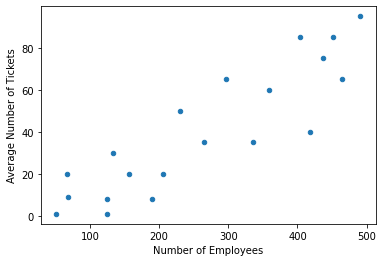

In [ ]:
data.plot.scatter(x='Number of Employees', y='Average Number of Tickets')

In [ ]:
data["Number of Employees"].corr(data["Average Number of Tickets"])

0.8866832281944961

**These two have a linear relationship. So I found the linear equation. The correlation between the two variables is 0.88, indicating a very good correlation between The Average no of tickets per week and the Number of employees.**

**Now try Linear regression between The Average no of tickets per week and the Number of employees**

In [ ]:
X = data[["Number of Employees"]]##Number of Employees
y = data[["Average Number of Tickets"]]##Average Number of Tickets

In [ ]:
X.shape

(20, 1)

In [ ]:
y.shape

(20, 1)

In [ ]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X)

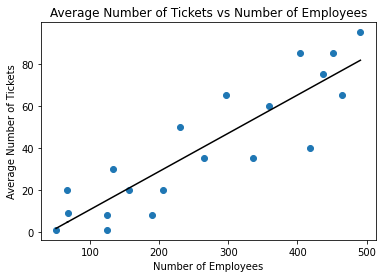

In [ ]:
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color = 'black')
plt.title('Average Number of Tickets vs Number of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Average Number of Tickets')
plt.show()

In [ ]:
regressor.score(X,y)#r squared value of the regression

0.7862071471614129

**The r squared value (aka. the coefficient of determination) of the linear regression comes out to be 0.78, which tells that the dataset is close to the fitted regression line**

**Now we plot Average Number of Tickets vs Value of Contract and see the results.**

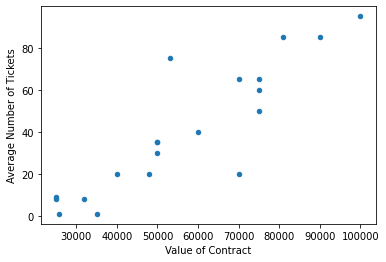

In [ ]:
data.plot.scatter(x='Value of Contract', y='Average Number of Tickets')

**visualising The plot, we can say Average Number of Tickets and Value of Contract does seems to have good direct relationship with each other. As the value of the contract increases, we do  see a trend that the Average Number of Tickets will increase. Hence we can conclude that Value of Contract is a good variable to initially explore for our multiple linear regression model.**

In [ ]:
data["Value of Contract"].corr(data["Average Number of Tickets"])

0.8858178776339527

**The correlation between the two variables is 0.88, indicating a very good correlation between The Value of Contract and the Number of employees.**

**Now try Linear regression between Value of Contract and the Number of employees**

In [ ]:
X = data[["Value of Contract"]]##Number of Employees
y = data[["Average Number of Tickets"]]##Average Number of Tickets

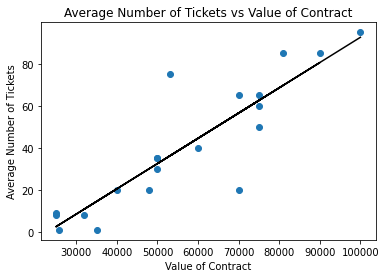

In [ ]:
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color = 'black')
plt.title('Average Number of Tickets vs Value of Contract')
plt.xlabel('Value of Contract')
plt.ylabel('Average Number of Tickets')
plt.show()

In [ ]:
regressor.score(X,y)#r squared value of the regression

0.7846733123359204

**The r squared value (aka. the coefficient of determination) of the linear regression comes out to be 0.78, which tells that the dataset is close to the fitted regression line**

**Now we will use the type of Indystry, but as it is a categorical value we first have to encode it.**

In [ ]:
dummies = pd.get_dummies(data.Industry)

In [ ]:
modified_data = data.join(dummies)
modified_data = modified_data.drop('Industry',1)
modified_data.head()

,Average Number of Tickets,Number of Employees,Value of Contract,Manufacturing,Retail,Services
0,1,51,25750,0,1,0
1,9,68,25000,0,0,1
2,20,67,40000,0,0,1
3,1,124,35000,0,1,0
4,8,124,25000,1,0,0


**Now we will do multiple linear regression with Average Number of Tickets as target variable and Number of Employees,Value of Contract, and type of Industry a independent variable**



In [ ]:
final_data_X = modified_data.drop(['Average Number of Tickets'], axis=1)
final_data_X.head()

,Number of Employees,Value of Contract,Manufacturing,Retail,Services
0,51,25750,0,1,0
1,68,25000,0,0,1
2,67,40000,0,0,1
3,124,35000,0,1,0
4,124,25000,1,0,0


In [ ]:
final_data_y = modified_data[['Average Number of Tickets']]
final_data_y.head()

,Average Number of Tickets
0,1
1,9
2,20
3,1
4,8


In [ ]:
regressor_final = LinearRegression()
regressor_final.fit(final_data_X, final_data_y)

LinearRegression()

In [ ]:
print(regressor_final.intercept_)

[-17.19426473]


In [ ]:
regressor_final.coef_

array([[ 1.11606828e-01,  4.85820566e-04, -1.25614070e+00,
        -9.98149961e+00,  1.12376403e+01]])

here are the coefficients from our linear equation from the last page:

Intercept: -17.19426473

Number of Employees: 0.1116

Value of Contract: 0.0004858

Industry - Manufacturing: -1.256

Industry - Retail: -9.98

Industry - Services: 11.23

In [ ]:
regressor_final.score(final_data_X,final_data_y)

0.9651071078612816

**r squared value of the final regression model is 0.965 which indicates the model is a great fit**

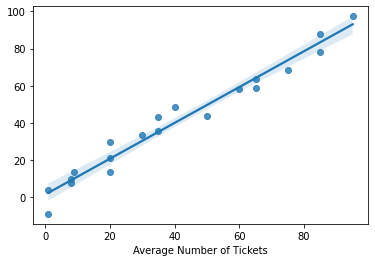

In [ ]:
import seaborn as sns
predictions = regressor_final.predict(final_data_X)
sns.regplot(x = final_data_y, y = predictions)

**The above graph shows our model is predicting good results.**